## Imports

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mticks
import matplotlib.dates as mdates
import seaborn as sns

## Part 1

In [2]:
# Loading the data 
url = 'https://docs.google.com/spreadsheets/d/e/2PACX-1vT_jChgNsQbHbg4TGepzIqk8XC9DTIKmyyxb1upo5cfZCgbfIUQc2ZC0YMzuU5uApP140Ob49KBjdqh/pub?gid=1198589591&single=true&output=csv'
df = pd.read_csv(url)
df.head()

,date,cloud_cover,sunshine,global_radiation,max_temp,mean_temp,min_temp,precipitation,pressure,snow_depth
0,19790101,2.0,7.0,52.0,2.3,-4.1,-7.5,0.4,101900.0,9.0
1,19790102,6.0,1.7,27.0,1.6,-2.6,-7.5,0.0,102530.0,8.0
2,19790103,5.0,0.0,13.0,1.3,-2.8,-7.2,0.0,102050.0,4.0
3,19790104,8.0,0.0,13.0,-0.3,-2.6,-6.5,0.0,100840.0,2.0
4,19790105,6.0,2.0,29.0,5.6,-0.8,-1.4,0.0,102250.0,1.0


In [3]:
# Checking the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15341 entries, 0 to 15340
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   date              15341 non-null  int64  
 1   cloud_cover       14938 non-null  float64
 2   sunshine          14957 non-null  float64
 3   global_radiation  14939 non-null  float64
 4   max_temp          14951 non-null  float64
 5   mean_temp         14922 non-null  float64
 6   min_temp          14955 non-null  float64
 7   precipitation     14951 non-null  float64
 8   pressure          14953 non-null  float64
 9   snow_depth        13589 non-null  float64
dtypes: float64(9), int64(1)
memory usage: 1.2 MB


In [4]:
# Converting the date column to datetime dtype
df['date'] = pd.to_datetime(df['date'], format='%Y%m%d')
df['date']

0       1979-01-01
1       1979-01-02
2       1979-01-03
3       1979-01-04
4       1979-01-05
           ...    
15336   2020-12-27
15337   2020-12-28
15338   2020-12-29
15339   2020-12-30
15340   2020-12-31
Name: date, Length: 15341, dtype: datetime64[ns]

In [5]:
df = df.set_index('date')
df

,cloud_cover,sunshine,global_radiation,max_temp,mean_temp,min_temp,precipitation,pressure,snow_depth
date,,,,,,,,,
1979-01-01,2.0,7.0,52.0,2.3,-4.1,-7.5,0.4,101900.0,9.0
1979-01-02,6.0,1.7,27.0,1.6,-2.6,-7.5,0.0,102530.0,8.0
1979-01-03,5.0,0.0,13.0,1.3,-2.8,-7.2,0.0,102050.0,4.0
1979-01-04,8.0,0.0,13.0,-0.3,-2.6,-6.5,0.0,100840.0,2.0
1979-01-05,6.0,2.0,29.0,5.6,-0.8,-1.4,0.0,102250.0,1.0
...,...,...,...,...,...,...,...,...,...
2020-12-27,1.0,0.9,32.0,7.5,7.5,7.6,2.0,98000.0,NaN
2020-12-28,7.0,3.7,38.0,3.6,1.1,-1.3,0.2,97370.0,NaN
2020-12-29,7.0,0.0,21.0,4.1,2.6,1.1,0.0,98830.0,NaN


In [6]:
# Confirming the data was changed
df.index

DatetimeIndex(['1979-01-01', '1979-01-02', '1979-01-03', '1979-01-04',
               '1979-01-05', '1979-01-06', '1979-01-07', '1979-01-08',
               '1979-01-09', '1979-01-10',
               ...
               '2020-12-22', '2020-12-23', '2020-12-24', '2020-12-25',
               '2020-12-26', '2020-12-27', '2020-12-28', '2020-12-29',
               '2020-12-30', '2020-12-31'],
              dtype='datetime64[ns]', name='date', length=15341, freq=None)

In [7]:
# Keeping only the requested features and everything after the year 2000
df = df.loc['2000':, ['precipitation', 'mean_temp', 'min_temp', 
                      'max_temp', 'snow_depth']]
df.head()

,precipitation,mean_temp,min_temp,max_temp,snow_depth
date,,,,,
2000-01-01,0.0,7.0,4.9,10.8,0.0
2000-01-02,0.2,7.9,5.0,11.5,0.0
2000-01-03,6.0,9.4,7.2,9.5,0.0
2000-01-04,0.2,7.0,4.4,11.0,0.0
2000-01-05,0.8,6.4,1.9,10.8,0.0


In [8]:
# Checking for missing values
df.isna().sum()

precipitation     390
mean_temp         419
min_temp          386
max_temp          390
snow_depth       1752
dtype: int64

In [9]:
# Interpolating temperature measures
df['mean_temp'] = df['mean_temp'].interpolate()
df['max_temp'] = df['max_temp'].interpolate()
df['min_temp'] = df['min_temp'].interpolate()

In [10]:
# Checking for missing values
df.isna().sum()

precipitation     390
mean_temp           0
min_temp            0
max_temp            0
snow_depth       1752
dtype: int64

In [11]:
# Filling precipitation & snow_depth with 0
df['precipitation'] = df['precipitation'].fillna(0)
df['snow_depth'] = df['snow_depth'].fillna(0)

In [12]:
# Checking for missing values
df.isna().sum()

precipitation    0
mean_temp        0
min_temp         0
max_temp         0
snow_depth       0
dtype: int64

## Part 2

### Question 1: What month had the most precipitation between 2000 through 2010?

In [13]:
prec_cols = ['precipitation']
plot_df = df.loc['2000':'2010', prec_cols].resample('M').sum()
plot_df

,precipitation
date,
2000-01-31,14.3
2000-02-29,62.2
2000-03-31,13.4
2000-04-30,71.8
2000-05-31,68.4
...,...
2010-08-31,83.8
2010-09-30,38.0
2010-10-31,61.0


In [14]:
# Finding the date with the max precipitation
max_date = plot_df['precipitation'].idxmax()
max_date

Timestamp('2009-11-30 00:00:00', freq='M')

In [15]:
maxp = plot_df['precipitation'].max()
maxp

138.4

In [16]:
# Creating tick locators and formatters

# For minor month ticks
# Creating the locator to place ticks every 3 months.
loc_3months = mdates.MonthLocator(interval=3)

# For major year ticks
loc_year = mdates.YearLocator()
fmt_year = mdates.DateFormatter("%Y")

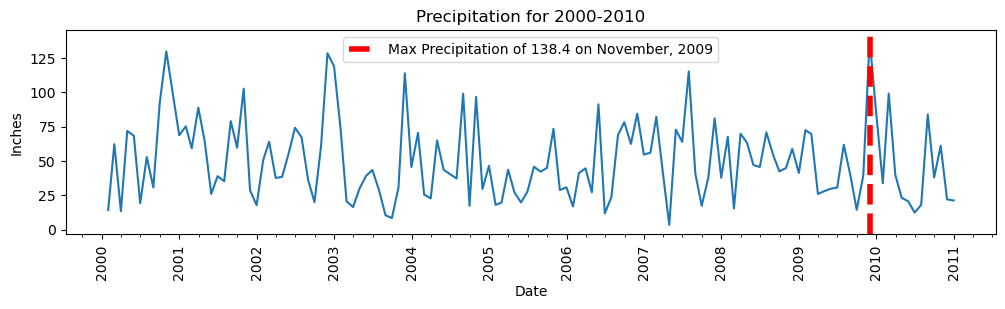

In [17]:
# Making the fig and axis
fig, ax = plt.subplots(figsize=(12,3))
ax.plot(plot_df)
ax.set(title='Precipitation for 2000-2010', ylabel='Inches', xlabel='Date')
# Minor ticks
ax.xaxis.set_minor_locator(loc_3months)

# Major ticks
ax.xaxis.set_major_locator(loc_year)
ax.xaxis.set_major_formatter(fmt_year)

# Making major/minor gridlines visually distince
fig.autofmt_xdate(rotation=90,ha='center')

# Making a vline
ax.axvline(x=max_date, color='r', lw=4, ls='--', label= f'Max Precipitation of {maxp} on {max_date.strftime("%B, %Y")}')
# Making a legend/labels
ax.legend();

### Question 2: Which year between 2000-2020 had the coolest average temperature?

In [18]:
temp_cols = ['mean_temp']
plot_df = df.loc['2000':'2020', temp_cols].resample('Y').mean()
plot_df

,mean_temp
date,
2000-12-31,11.575683
2001-12-31,11.331507
2002-12-31,12.084247
2003-12-31,12.114521
2004-12-31,11.900683
2005-12-31,11.822877
2006-12-31,12.290822
2007-12-31,11.944384
2008-12-31,11.326776


In [19]:
# Finding the date with the min average temp
min_date = plot_df['mean_temp'].idxmin()
min_date

Timestamp('2010-12-31 00:00:00', freq='A-DEC')

In [20]:
# Finding the min average temp 
mint = plot_df['mean_temp'].min()
umint = round(mint, 2)
umint

10.66

In [21]:
# Creating tick locators and formatters

# For minor year ticks
# Creating the locator to place ticks every 1 years.
loc_single_year = mdates.YearLocator()

# For major year ticks
# Creating the locator to place ticks every 5 years
loc_interval_year = mdates.YearLocator(5)
fmt_year = mdates.DateFormatter("%Y")

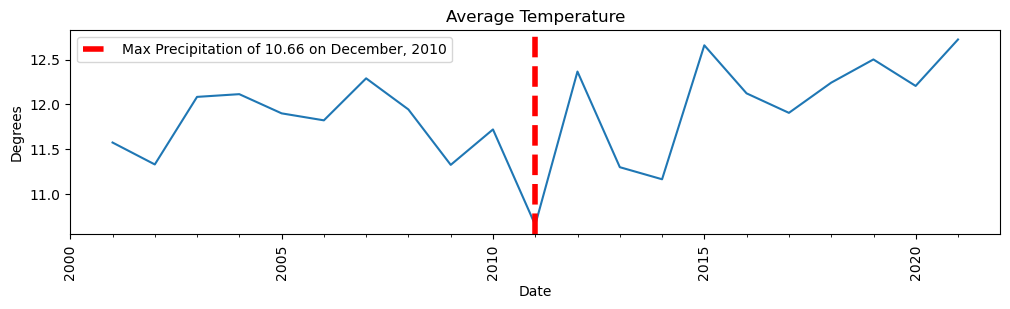

In [22]:
# Making the fig and axis
fig, ax = plt.subplots(figsize=(12,3))
ax.plot(plot_df)
ax.set(title='Average Temperature', ylabel='Degrees', xlabel='Date')
# Minor ticks
ax.xaxis.set_minor_locator(loc_single_year)

# Major ticks
ax.xaxis.set_major_locator(loc_interval_year)
ax.xaxis.set_major_formatter(fmt_year)

# Making major/minor gridlines visually distince
fig.autofmt_xdate(rotation=90,ha='center')

# Making a vline
ax.axvline(x=min_date, color='r', lw=4, ls='--', label= f'Max Precipitation of {umint} on {min_date.strftime("%B, %Y")}')
# Making a legend/labels
ax.legend();